In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

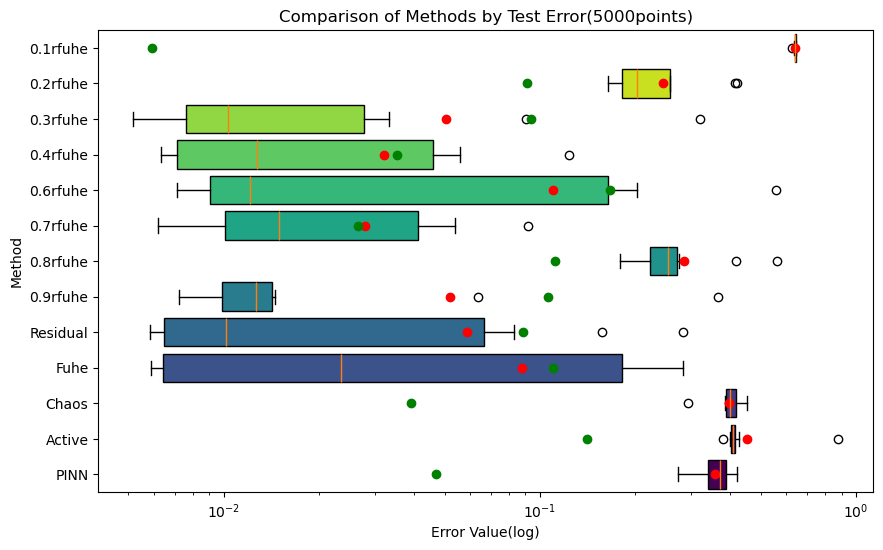

In [2]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.3691156588914792, 0.37268337981556476, 0.2731114551367104, 0.3873034863913935, 0.36197964683462247, 0.4207140669790491, 0.38876599096799175, 0.3321470495807457, 0.3972810105000391, 0.27697321985521184],
    'Active': [0.406791018561283, 0.4020658881161391, 0.40727094553283494, 0.38088631764853365, 0.41359395118543935, 0.39933047735031596, 0.4077557609629859, 0.41432409295269873, 0.8765265566941944, 0.4279126033461917],
    'Chaos': [0.4207248070114408, 0.40493640228929795, 0.4140993576585341, 0.3876556280084707, 0.38596453440354767, 0.3916064490911243, 0.3890889787640442, 0.4197863087251242, 0.4524113944935419, 0.2949776809709737],
    'Fuhe': [0.04385181578990157, 0.22821787534276072, 0.2516653232199815, 0.006277909191729946, 0.00629519042455999, 0.016712830464768725, 0.005885536076921183, 0.030390849841934367, 0.28285159129739457, 0.006873473130840265],
    'Residual': [0.006632507948763328, 0.018162637057885, 0.009165050431702121, 0.006219852911515435, 0.005840819357980815, 0.28276701040919233, 0.1575011723290768, 0.08304531927275326, 0.011200630675489587, 0.006415283185069581],
    '0.9rfuhe': [0.014499661601824167, 0.009407443130670793, 0.01264477423031061, 0.007217601400627772, 0.011339327415050091, 0.013583813526698942, 0.0638363538676611, 0.012671564364295694, 0.36665034129588625, 0.0079310850547664],
    '0.8rfuhe': [0.4177978682826894, 0.21663176696710346, 0.2563362110705422, 0.17866868933325358, 0.2522782060280314, 0.24255650631365447, 0.25509929175560664, 0.275996762117594, 0.5637794925330895, 0.19177244787066572],
    '0.7rfuhe': [0.010059970045884877, 0.09184006077386814, 0.006362731358770364, 0.010216818767148906, 0.006186435143264482, 0.04721487079567059, 0.0233256886305788, 0.017857368051842747, 0.05388174449559255, 0.012126858517752463],
    '0.6rfuhe': [0.009023073195675822, 0.20341870728590114, 0.011775576912104936, 0.007129028553370078, 0.007339105831900612, 0.012479037013525367, 0.09183611259254482, 0.009222445191843781, 0.5576600879314431, 0.18790820020308666],
    '0.4rfuhe': [0.05595669253229646, 0.040012524264902115, 0.01332210388291555, 0.006355665082780949, 0.006981332196418744, 0.0481086976613561, 0.0065289971569559855, 0.012250210477715557, 0.12363842994846656, 0.007575332645308487],
    '0.3rfuhe': [0.011120796844175702, 0.006542063256514517, 0.010632242655506606, 0.033283497047892664, 0.010049917153352838, 0.005182243395491948, 0.09045795237119221, 0.006890003697098992, 0.3208228850248412, 0.0096643849617906],
    '0.2rfuhe': [0.17909098709694565, 0.21528424260977747, 0.2561843784645481, 0.19109811837341498, 0.16831365644140217, 0.19190983012882684, 0.4152720335857875, 0.2585049597254374, 0.42074431863851347, 0.16423443381600802],
    '0.1rfuhe': [0.6430018987864705, 0.6477022680815816, 0.6351385505793145, 0.6400083081789708, 0.6418091362988803, 0.6450648503685014, 0.6468068154274575, 0.62634876770379, 0.6411930040174411, 0.6387243024506059]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(5000points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

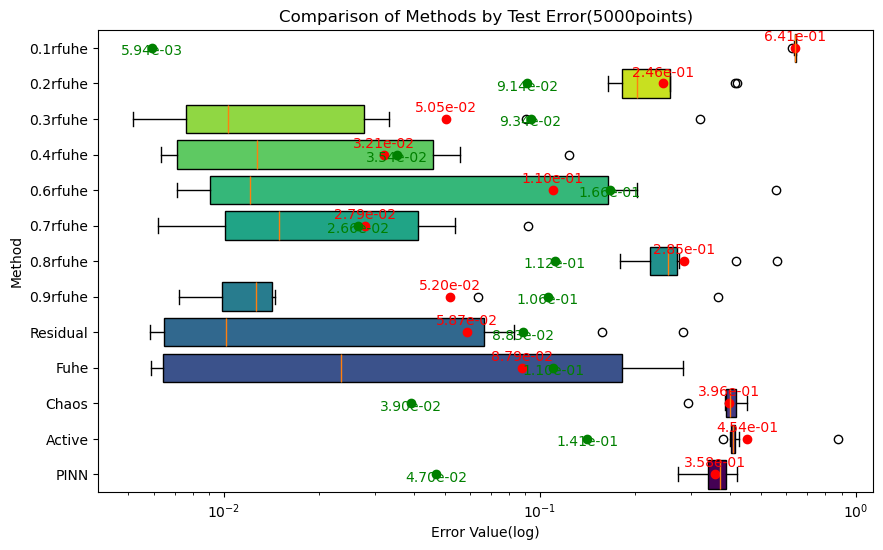

In [3]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.3691156588914792, 0.37268337981556476, 0.2731114551367104, 0.3873034863913935, 0.36197964683462247, 0.4207140669790491, 0.38876599096799175, 0.3321470495807457, 0.3972810105000391, 0.27697321985521184],
    'Active': [0.406791018561283, 0.4020658881161391, 0.40727094553283494, 0.38088631764853365, 0.41359395118543935, 0.39933047735031596, 0.4077557609629859, 0.41432409295269873, 0.8765265566941944, 0.4279126033461917],
    'Chaos': [0.4207248070114408, 0.40493640228929795, 0.4140993576585341, 0.3876556280084707, 0.38596453440354767, 0.3916064490911243, 0.3890889787640442, 0.4197863087251242, 0.4524113944935419, 0.2949776809709737],
    'Fuhe': [0.04385181578990157, 0.22821787534276072, 0.2516653232199815, 0.006277909191729946, 0.00629519042455999, 0.016712830464768725, 0.005885536076921183, 0.030390849841934367, 0.28285159129739457, 0.006873473130840265],
    'Residual': [0.006632507948763328, 0.018162637057885, 0.009165050431702121, 0.006219852911515435, 0.005840819357980815, 0.28276701040919233, 0.1575011723290768, 0.08304531927275326, 0.011200630675489587, 0.006415283185069581],
    '0.9rfuhe': [0.014499661601824167, 0.009407443130670793, 0.01264477423031061, 0.007217601400627772, 0.011339327415050091, 0.013583813526698942, 0.0638363538676611, 0.012671564364295694, 0.36665034129588625, 0.0079310850547664],
    '0.8rfuhe': [0.4177978682826894, 0.21663176696710346, 0.2563362110705422, 0.17866868933325358, 0.2522782060280314, 0.24255650631365447, 0.25509929175560664, 0.275996762117594, 0.5637794925330895, 0.19177244787066572],
    '0.7rfuhe': [0.010059970045884877, 0.09184006077386814, 0.006362731358770364, 0.010216818767148906, 0.006186435143264482, 0.04721487079567059, 0.0233256886305788, 0.017857368051842747, 0.05388174449559255, 0.012126858517752463],
    '0.6rfuhe': [0.009023073195675822, 0.20341870728590114, 0.011775576912104936, 0.007129028553370078, 0.007339105831900612, 0.012479037013525367, 0.09183611259254482, 0.009222445191843781, 0.5576600879314431, 0.18790820020308666],
    '0.4rfuhe': [0.05595669253229646, 0.040012524264902115, 0.01332210388291555, 0.006355665082780949, 0.006981332196418744, 0.0481086976613561, 0.0065289971569559855, 0.012250210477715557, 0.12363842994846656, 0.007575332645308487],
    '0.3rfuhe': [0.011120796844175702, 0.006542063256514517, 0.010632242655506606, 0.033283497047892664, 0.010049917153352838, 0.005182243395491948, 0.09045795237119221, 0.006890003697098992, 0.3208228850248412, 0.0096643849617906],
    '0.2rfuhe': [0.17909098709694565, 0.21528424260977747, 0.2561843784645481, 0.19109811837341498, 0.16831365644140217, 0.19190983012882684, 0.4152720335857875, 0.2585049597254374, 0.42074431863851347, 0.16423443381600802],
    '0.1rfuhe': [0.6430018987864705, 0.6477022680815816, 0.6351385505793145, 0.6400083081789708, 0.6418091362988803, 0.6450648503685014, 0.6468068154274575, 0.62634876770379, 0.6411930040174411, 0.6387243024506059]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值


# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(5000points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

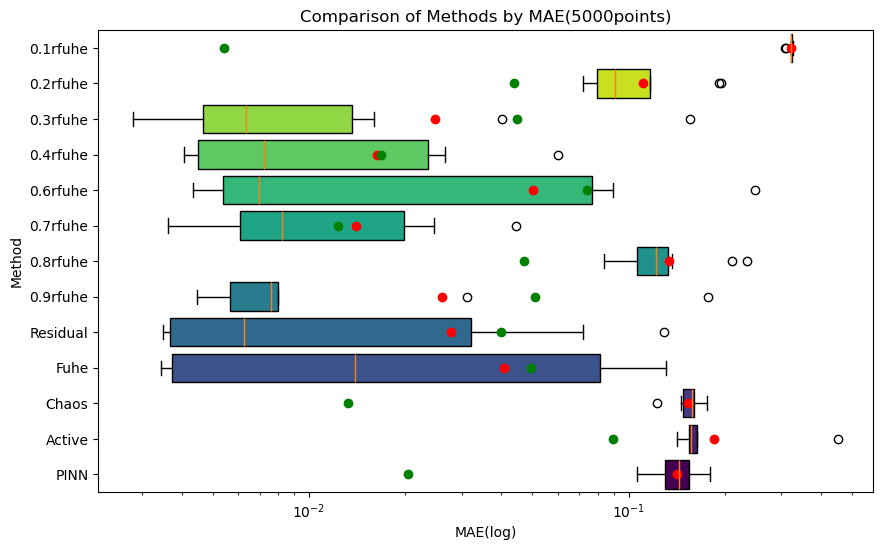

In [4]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.1424310634747787, 0.1454416022809645, 0.1063579902603014, 0.15471154855421707, 0.14087207050575765, 0.17920023653294048, 0.15564607940454037, 0.12642237774089957, 0.15314105231919678, 0.11357075008216191],
    'Active': [0.15667540047145262, 0.15604403058713803, 0.15633998704078028, 0.14764539932752804, 0.16296795831673316, 0.1414842174511855, 0.1642456424941832, 0.15367906464694636, 0.45193151009161037, 0.1639267408659676],
    'Chaos': [0.16281857120564652, 0.1592631570133127, 0.1599094415306619, 0.1554935182721178, 0.14823149467032126, 0.14799390292597345, 0.14576440792827672, 0.1602230947166097, 0.17570721587976304, 0.1230364301219959],
    'Fuhe': [0.019706326844955095, 0.10200840407585572, 0.11408034175971078, 0.0034409633733828784, 0.00367719317946385, 0.010132544081973996, 0.003588015780946924, 0.017673438487176306, 0.1305298594663664, 0.0038513881903929296],
    'Residual': [0.003601141192483609, 0.010432721020441819, 0.005795824085601236, 0.0036039223194754663, 0.003488607169311166, 0.1287852171785905, 0.07215661153780342, 0.039461472779582986, 0.006750977953352744, 0.003827162185124453],
    '0.9rfuhe': [0.007998850468017377, 0.005358662488689934, 0.0073806850519828205, 0.004467557165235161, 0.006547847405598024, 0.007790816903893392, 0.03125841259677241, 0.00787709690333388, 0.1774973306185593, 0.004979076865515086],
    '0.8rfuhe': [0.21008341374564754, 0.10279927148826243, 0.12192739145823119, 0.08390813933089118, 0.1224323468554328, 0.11578056032679379, 0.12143641080541376, 0.13644280564948186, 0.2345475517414787, 0.0890346768553749],
    '0.7rfuhe': [0.005908838869176713, 0.04430138482448838, 0.0038687988351311514, 0.006574684585995272, 0.003609023345890195, 0.022429219544863606, 0.012124151477993969, 0.009676502123638197, 0.02460827493981466, 0.006793177716048463],
    '0.6rfuhe': [0.00533666239918002, 0.08944337568611893, 0.006706886408054771, 0.004343451536932613, 0.0044192210056741964, 0.00721313005768591, 0.04263696663005612, 0.005437050364267095, 0.24949529390363495, 0.08783478727878917],
    '0.4rfuhe': [0.026558389969967146, 0.020344488202283642, 0.007661176559997736, 0.0040689045828084395, 0.004464521764209344, 0.024689878826736848, 0.004148343168394927, 0.0068107835238626095, 0.05990738256131606, 0.004558866671641339],
    '0.3rfuhe': [0.006639158504276304, 0.004113385162259816, 0.0067128048463515975, 0.01596070905465332, 0.006040853423232499, 0.002819063330380715, 0.04003466765642507, 0.00425705698227719, 0.15508267390890174, 0.0058001975538847575],
    '0.2rfuhe': [0.07766432994471659, 0.0955467313948798, 0.11611335628117353, 0.08479901993863445, 0.07486338853086212, 0.08563944661598488, 0.19209179600961943, 0.11684044740039444, 0.1941123239967505, 0.07183897348388565],
    '0.1rfuhe': [0.32405144730570845, 0.32625885656875986, 0.31197442617241694, 0.3222107825428796, 0.32362883672269055, 0.3236519480682367, 0.3222967820039757, 0.30965601669459597, 0.32120774431277016, 0.3265892737180827]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(5000points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

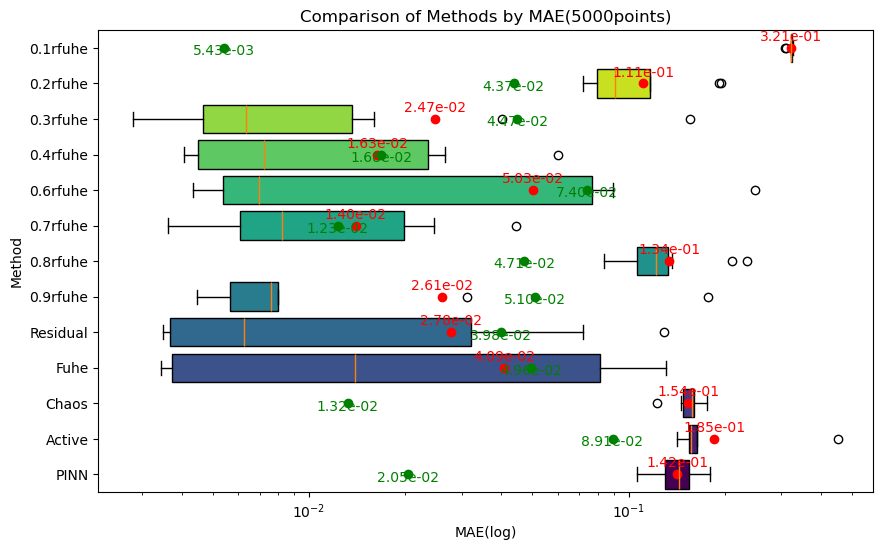

In [6]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.1424310634747787, 0.1454416022809645, 0.1063579902603014, 0.15471154855421707, 0.14087207050575765, 0.17920023653294048, 0.15564607940454037, 0.12642237774089957, 0.15314105231919678, 0.11357075008216191],
    'Active': [0.15667540047145262, 0.15604403058713803, 0.15633998704078028, 0.14764539932752804, 0.16296795831673316, 0.1414842174511855, 0.1642456424941832, 0.15367906464694636, 0.45193151009161037, 0.1639267408659676],
    'Chaos': [0.16281857120564652, 0.1592631570133127, 0.1599094415306619, 0.1554935182721178, 0.14823149467032126, 0.14799390292597345, 0.14576440792827672, 0.1602230947166097, 0.17570721587976304, 0.1230364301219959],
    'Fuhe': [0.019706326844955095, 0.10200840407585572, 0.11408034175971078, 0.0034409633733828784, 0.00367719317946385, 0.010132544081973996, 0.003588015780946924, 0.017673438487176306, 0.1305298594663664, 0.0038513881903929296],
    'Residual': [0.003601141192483609, 0.010432721020441819, 0.005795824085601236, 0.0036039223194754663, 0.003488607169311166, 0.1287852171785905, 0.07215661153780342, 0.039461472779582986, 0.006750977953352744, 0.003827162185124453],
    '0.9rfuhe': [0.007998850468017377, 0.005358662488689934, 0.0073806850519828205, 0.004467557165235161, 0.006547847405598024, 0.007790816903893392, 0.03125841259677241, 0.00787709690333388, 0.1774973306185593, 0.004979076865515086],
    '0.8rfuhe': [0.21008341374564754, 0.10279927148826243, 0.12192739145823119, 0.08390813933089118, 0.1224323468554328, 0.11578056032679379, 0.12143641080541376, 0.13644280564948186, 0.2345475517414787, 0.0890346768553749],
    '0.7rfuhe': [0.005908838869176713, 0.04430138482448838, 0.0038687988351311514, 0.006574684585995272, 0.003609023345890195, 0.022429219544863606, 0.012124151477993969, 0.009676502123638197, 0.02460827493981466, 0.006793177716048463],
    '0.6rfuhe': [0.00533666239918002, 0.08944337568611893, 0.006706886408054771, 0.004343451536932613, 0.0044192210056741964, 0.00721313005768591, 0.04263696663005612, 0.005437050364267095, 0.24949529390363495, 0.08783478727878917],
    '0.4rfuhe': [0.026558389969967146, 0.020344488202283642, 0.007661176559997736, 0.0040689045828084395, 0.004464521764209344, 0.024689878826736848, 0.004148343168394927, 0.0068107835238626095, 0.05990738256131606, 0.004558866671641339],
    '0.3rfuhe': [0.006639158504276304, 0.004113385162259816, 0.0067128048463515975, 0.01596070905465332, 0.006040853423232499, 0.002819063330380715, 0.04003466765642507, 0.00425705698227719, 0.15508267390890174, 0.0058001975538847575],
    '0.2rfuhe': [0.07766432994471659, 0.0955467313948798, 0.11611335628117353, 0.08479901993863445, 0.07486338853086212, 0.08563944661598488, 0.19209179600961943, 0.11684044740039444, 0.1941123239967505, 0.07183897348388565],
    '0.1rfuhe': [0.32405144730570845, 0.32625885656875986, 0.31197442617241694, 0.3222107825428796, 0.32362883672269055, 0.3236519480682367, 0.3222967820039757, 0.30965601669459597, 0.32120774431277016, 0.3265892737180827]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值


# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(5000points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

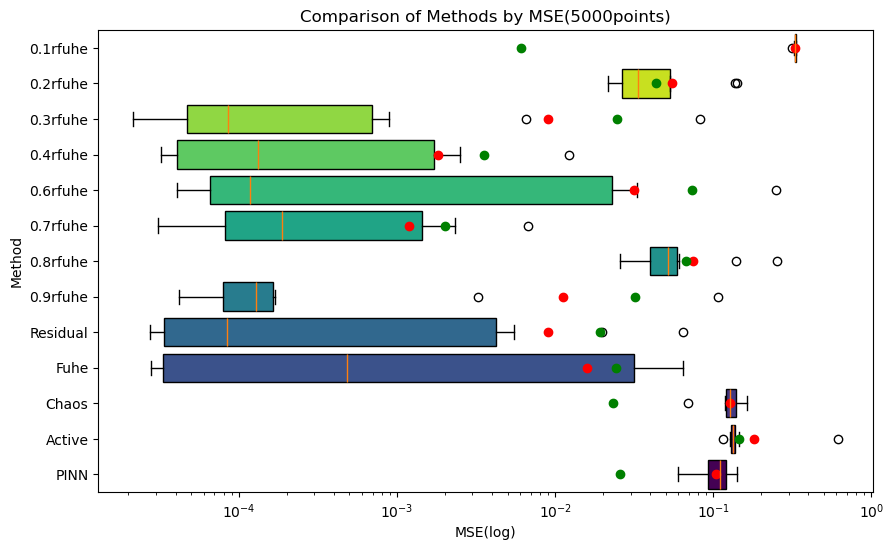

In [5]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.10898719420538003, 0.11110422743402878, 0.05966647283197838, 0.11999229113602124, 0.10481388941775466, 0.14158739768329792, 0.12090021278109744, 0.08824931257061107, 0.12625429081865353, 0.06136575652381427],
    'Active': [0.1323711202861774, 0.12931383452472062, 0.13268364412779815, 0.11604896650850122, 0.13683553363348677, 0.12756027523925872, 0.13299972543039165, 0.13731908773762586, 0.6145832086797101, 0.1464740496888758],
    'Chaos': [0.14159462669115114, 0.13116687538553728, 0.13717016047740085, 0.12021058758832102, 0.11916407137706703, 0.12267334388097337, 0.12110118465262538, 0.14096362942396456, 0.16372598135991465, 0.0696031423591046],
    'Fuhe': [0.0015382456485698679, 0.04166293381591757, 0.05066374511899316, 3.152685083575106e-05, 3.1700657974833504e-05, 0.00022343466263694358, 2.7709110552632965e-05, 0.0007388158817394034, 0.06399820391151066, 3.779227286967959e-05],
    'Residual': [3.5188932431636076e-05, 0.00026388113426977774, 6.719241508980413e-05, 3.0946444702773905e-05, 2.7289657347888378e-05, 0.06395993496927799, 0.019843492643235518, 0.0055167188476147305, 0.00010035418482765995, 3.292169573387046e-05],
    '0.9rfuhe': [0.0001681768703557263, 7.079355739832248e-05, 0.00012790063247350108, 4.167123014409876e-05, 0.0001028549325918771, 0.00014760258222198816, 0.003259767909606765, 0.00012844316566663433, 0.10753620853448224, 5.031711679785394e-05],
    '0.8rfuhe': [0.13963136145953853, 0.03754004744752856, 0.05256182723356682, 0.02553568051739086, 0.05091080933340922, 0.0470626513539286, 0.052055789645738954, 0.06093383430996904, 0.25425475387165575, 0.029418664718989875],
    '0.7rfuhe': [8.095504307940063e-05, 0.006747064438369165, 3.238453813412732e-05, 8.349912266665545e-05, 3.061480246527407e-05, 0.0017832332123510009, 0.00043523065929074374, 0.00025508530044683847, 0.002322382923014267, 0.00011763787058646735],
    '0.6rfuhe': [6.512676313775094e-05, 0.033100329208372414, 0.00011092129207145563, 4.065474500109e-05, 4.308606515288462e-05, 0.00012456977464204717, 0.006746484341601278, 6.803661511481897e-05, 0.2487652185735711, 0.02824502729716062],
    '0.4rfuhe': [0.0025046935994698116, 0.0012806853279525607, 0.00014196986350672422, 3.231264730590265e-05, 3.898765735388521e-05, 0.0018513892335004323, 3.409914518710311e-05, 0.00012004321945109787, 0.012228058166865688, 4.59043613303731e-05],
    '0.3rfuhe': [9.892871026884192e-05, 3.423576299670951e-05, 9.042745175858721e-05, 0.0008861524334854655, 8.079332774339098e-05, 2.148256559323926e-05, 0.006545518256268072, 3.797427078766054e-05, 0.08233437875176176, 7.471348161882201e-05],
    '0.2rfuhe': [0.02565653442682851, 0.03707447587020902, 0.05249957901944015, 0.02921213874875255, 0.02266153075169114, 0.029460829798499365, 0.13794815688850215, 0.05345499496644016, 0.14160776024338392, 0.021576399181037174],
    '0.1rfuhe': [0.33073110649530074, 0.33558409458849503, 0.32269146616922517, 0.3276587397764382, 0.3295052383406045, 0.3328566888561147, 0.33465684155390335, 0.3138217122855741, 0.32887289656032276, 0.3263453391014438]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(5000points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

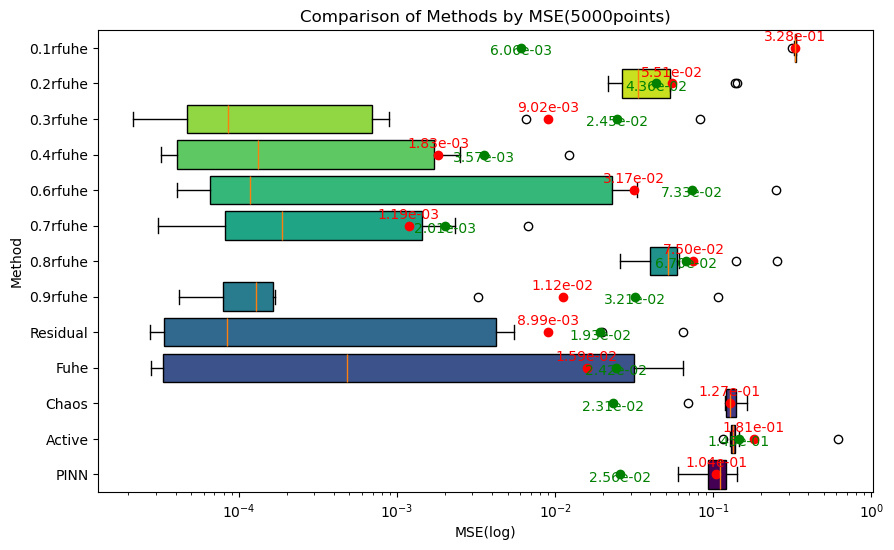

In [7]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.10898719420538003, 0.11110422743402878, 0.05966647283197838, 0.11999229113602124, 0.10481388941775466, 0.14158739768329792, 0.12090021278109744, 0.08824931257061107, 0.12625429081865353, 0.06136575652381427],
    'Active': [0.1323711202861774, 0.12931383452472062, 0.13268364412779815, 0.11604896650850122, 0.13683553363348677, 0.12756027523925872, 0.13299972543039165, 0.13731908773762586, 0.6145832086797101, 0.1464740496888758],
    'Chaos': [0.14159462669115114, 0.13116687538553728, 0.13717016047740085, 0.12021058758832102, 0.11916407137706703, 0.12267334388097337, 0.12110118465262538, 0.14096362942396456, 0.16372598135991465, 0.0696031423591046],
    'Fuhe': [0.0015382456485698679, 0.04166293381591757, 0.05066374511899316, 3.152685083575106e-05, 3.1700657974833504e-05, 0.00022343466263694358, 2.7709110552632965e-05, 0.0007388158817394034, 0.06399820391151066, 3.779227286967959e-05],
    'Residual': [3.5188932431636076e-05, 0.00026388113426977774, 6.719241508980413e-05, 3.0946444702773905e-05, 2.7289657347888378e-05, 0.06395993496927799, 0.019843492643235518, 0.0055167188476147305, 0.00010035418482765995, 3.292169573387046e-05],
    '0.9rfuhe': [0.0001681768703557263, 7.079355739832248e-05, 0.00012790063247350108, 4.167123014409876e-05, 0.0001028549325918771, 0.00014760258222198816, 0.003259767909606765, 0.00012844316566663433, 0.10753620853448224, 5.031711679785394e-05],
    '0.8rfuhe': [0.13963136145953853, 0.03754004744752856, 0.05256182723356682, 0.02553568051739086, 0.05091080933340922, 0.0470626513539286, 0.052055789645738954, 0.06093383430996904, 0.25425475387165575, 0.029418664718989875],
    '0.7rfuhe': [8.095504307940063e-05, 0.006747064438369165, 3.238453813412732e-05, 8.349912266665545e-05, 3.061480246527407e-05, 0.0017832332123510009, 0.00043523065929074374, 0.00025508530044683847, 0.002322382923014267, 0.00011763787058646735],
    '0.6rfuhe': [6.512676313775094e-05, 0.033100329208372414, 0.00011092129207145563, 4.065474500109e-05, 4.308606515288462e-05, 0.00012456977464204717, 0.006746484341601278, 6.803661511481897e-05, 0.2487652185735711, 0.02824502729716062],
    '0.4rfuhe': [0.0025046935994698116, 0.0012806853279525607, 0.00014196986350672422, 3.231264730590265e-05, 3.898765735388521e-05, 0.0018513892335004323, 3.409914518710311e-05, 0.00012004321945109787, 0.012228058166865688, 4.59043613303731e-05],
    '0.3rfuhe': [9.892871026884192e-05, 3.423576299670951e-05, 9.042745175858721e-05, 0.0008861524334854655, 8.079332774339098e-05, 2.148256559323926e-05, 0.006545518256268072, 3.797427078766054e-05, 0.08233437875176176, 7.471348161882201e-05],
    '0.2rfuhe': [0.02565653442682851, 0.03707447587020902, 0.05249957901944015, 0.02921213874875255, 0.02266153075169114, 0.029460829798499365, 0.13794815688850215, 0.05345499496644016, 0.14160776024338392, 0.021576399181037174],
    '0.1rfuhe': [0.33073110649530074, 0.33558409458849503, 0.32269146616922517, 0.3276587397764382, 0.3295052383406045, 0.3328566888561147, 0.33465684155390335, 0.3138217122855741, 0.32887289656032276, 0.3263453391014438]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值


# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(5000points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()